# Imports

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pixiedust
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix as cm
import statsmodels.formula.api as sm #for backward elimination

# Data

In [52]:
daily = pd.read_csv('Bike-Sharing/day.csv')
hourly = pd.read_csv('Bike-Sharing/hour.csv')

In [53]:
daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [54]:
daily.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [55]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [56]:
# There are no empty cells in 'daily'
# daily.isna().sum()


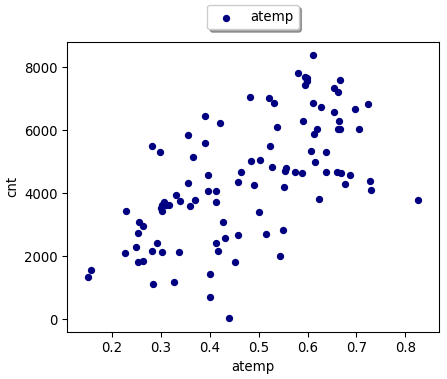

In [57]:
# When running on 'Python with Pixiedust' kernel, can open interactive:
display(daily)
# Definitely seems to be a positive linear correlation between daily temperature (or atemp) and rental count
# Similar, weaker relationship seems plausible with season.


In [58]:
hourly.head()
# Note that 'dteday' is formatted as yyyy-mm-dd and 'temp' is a float
# Readme.txt defines 'temp' as normalized temperatures in Celsius (divided by the max of 41)
# and 'atemp' as normalized temperature feeling (divided by the max of 50).
# Also defines 'windspeed' as normalized wind speed (divided by the max of 67).

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
hourly.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [60]:
hourly.info()
# This dataset has additional 'hr' column, but all others match the daily dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [61]:
# There are no empty cells in 'hourly'
# hourly.isna().sum()


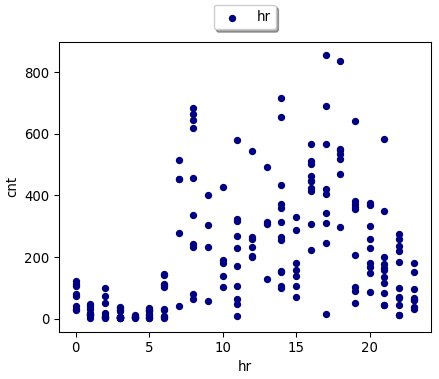

In [62]:
# When running on 'Python with Pixiedust' kernel:
display(hourly)
# Not much going on in hours 3-5am

# A few Single Linear Regressions

In [63]:
X_day = daily.iloc[:, 10].values
y_day = daily.iloc[:, 15].values
X_day_train, X_day_test, y_day_train, y_day_test = train_test_split(X_day, y_day, test_size=0.25)
regressor = LinearRegression()
regressor.fit(X_day_train.reshape(-1, 1), y_day_train)
# Predicting test set results for daily dataset
y_day_pred = regressor.predict(X_day_test.reshape(-1, 1))
regressor.score(X_day_test.reshape(-1, 1), y_day_test)

0.38372428799794767

# Building initial Multiple Linear Regressions

In [64]:
X_day = daily.iloc[:, 2:-3].values
y_day = daily.iloc[:, 15].values
X_hour = hourly.iloc[:, 2:-3].values
y_hour = hourly.iloc[:, 16].values

In [65]:
X_day_train, X_day_test, y_day_train, y_day_test = train_test_split(X_day, y_day, test_size=0.25)

In [66]:
# Basic Multiple Linear on daily dataset
regressor = LinearRegression()
regressor.fit(X_day_train, y_day_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
# Predicting test set results for daily dataset
y_day_pred = regressor.predict(X_day_test)

print(y_day_test -  y_day_pred)

[ 9.33218693e+01  2.17437769e+02  2.19334852e+02  5.41314369e+02
 -2.51853928e+02 -1.66391755e+03  1.05242772e+03 -2.25292962e+02
  8.59349983e+01 -8.51586415e+02 -5.15722229e+01  1.11429500e+03
  6.78365495e+01  2.67516926e+01  6.76397143e+02 -1.23262857e+02
 -4.11152315e+02 -2.77701031e+02 -3.33308502e+02 -2.05757218e+02
  9.93893015e+02 -5.72205778e+02 -1.44256639e+02  1.58248336e+02
  1.07746482e+03  5.38143788e+02 -1.74111154e+02  1.37417405e+03
  1.34626801e+03  3.86502169e+02  1.29259039e+03 -1.58134280e+02
 -1.01352293e+03 -1.00251060e+03  8.40300911e+02 -1.22623141e+02
 -2.12668679e+03  1.22639529e+03 -6.78991316e+01 -8.01794198e+02
 -8.55790818e+02 -5.59394325e+02 -3.79127916e+02  3.04876220e+03
 -2.10003809e+02 -1.29171703e+03  3.91525386e+01 -1.55716426e+02
  2.51525598e+02  4.55004257e+02  1.47918187e+02  3.70491486e+01
 -5.65729516e+02  9.52301042e+01 -2.71795715e+02  3.45071862e+02
 -9.51643450e+02 -4.56728765e+02  9.29908950e+02 -5.12620807e+02
  1.90928407e+03  1.06852

In [68]:
# Backward elimination on daily dataset
X_day = np.append(arr = np.ones((731,1)).astype(int), values = X_day, axis = 1)
X_opt = X_day[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
regressor_OLS = sm.OLS(endog = y_day, exog = X_opt).fit()
regressor_OLS.summary()
# Remove independent variables with P-value > .05:
# Drop indices 6 & 8

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     261.9
Date:                Mon, 01 Oct 2018   Prob (F-statistic):          7.80e-243
Time:                        07:43:45   Log-Likelihood:                -5981.0
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     719   BIC:                         1.204e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.0031    240.218      6.115      0.000     997.390    1940.616
x1           509.7752     54.757      9.310      0.000     402.272     617.278
x2          2040.7034     65.185     31.306      0.000    1912.727    2168.680
x3           -38.9796     17.079     -2.282      0.023     -72.510      -5.449
x4          -518.9919    201.040     -2.582      0.010    -913.688    -124.296
x5            69.0622     16.299      4.237      0.000      37.063     101.061
x6           120.3570     72.007      1.671      0.095     -21.013     261.727
x7          -610.9870     78.363     -7.797      0.000    -764.835    -457.139
x8          2028.9161   1403.671      1.445      0.149    -726.867    4784.699
x9          3573.2743   1589.389      2.248      0.025     452.877    6693.671
x10        -1018.8616    313.995     -3.245      0.001   -1635.318    -402.405
x11        -2557.5691    456.278     -5.605      0.000   -3453.365   -1661.774
==============================================================================
Omnibus:                       88.811   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.069
Skew:                          -0.717   Prob(JB):                     7.92e-40
Kurtosis:                       4.964   Cond. No.                         561.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
X_opt = X_day[:, [0, 1, 2, 3, 4, 5, 7, 9, 10, 11]]
regressor_OLS = sm.OLS(endog = y_day, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     318.2
Date:                Mon, 01 Oct 2018   Prob (F-statistic):          2.87e-244
Time:                        07:44:48   Log-Likelihood:                -5983.5
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     721   BIC:                         1.203e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1458.3767    228.137      6.393      0.000    1010.484    1906.269
x1           509.7017     54.867      9.290      0.000     401.984     617.420
x2          2041.0816     65.316     31.249      0.000    1912.849    2169.314
x3           -39.2280     17.113     -2.292      0.022     -72.824      -5.632
x4          -592.0094    195.080     -3.035      0.002    -975.002    -209.017
x5            70.5067     16.309      4.323      0.000      38.488     102.525
x6          -598.2989     78.304     -7.641      0.000    -752.029    -444.569
x7          5868.6082    220.345     26.634      0.000    5436.014    6301.202
x8         -1060.9489    313.980     -3.379      0.001   -1677.373    -444.525
x9         -2466.4982    450.986     -5.469      0.000   -3351.900   -1581.096
==============================================================================
Omnibus:                       98.079   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.980
Skew:                          -0.773   Prob(JB):                     5.08e-45
Kurtosis:                       5.075   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0 - Season
1 - Year
2 - Month
3 - Holiday
4 - Weekday
5 - Workday
7 - Weathersit
9 - Temp
10 - Atemp
11 - Humidity

In [72]:
X_hour_train, X_hour_test, y_hour_train, y_hour_test = train_test_split(X_hour, y_hour, test_size=0.2)

In [73]:
# Basic Multiple Linear on hourly dataset
regressor = LinearRegression()
regressor.fit(X_hour_train, y_hour_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
# Predicting test set results for hourly dataset
y_hour_pred = regressor.predict(X_hour_test)

print(y_hour_test - y_hour_pred)

[  -6.32021466 -102.66259432  125.97023868 ... -153.1615886    17.70898946
  -49.15533633]


In [75]:
# Backward elimination on hourly dataset
X_hour = np.append(arr = np.ones((17379,1)).astype(int), values = X_hour, axis = 1)
X_opt = X_hour[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
regressor_OLS = sm.OLS(endog = y_hour, exog = X_opt).fit()
regressor_OLS.summary()
# Remove independent variables with P-value > .05:
#Remove indices 3, 7, & 8

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     920.8
Date:                Mon, 01 Oct 2018   Prob (F-statistic):               0.00
Time:                        07:43:46   Log-Likelihood:            -1.1076e+05
No. Observations:               17379   AIC:                         2.216e+05
Df Residuals:                   17366   BIC:                         2.217e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.7573      7.057     -3.650      0.000     -39.590     -11.925
x1            19.8993      1.819     10.941      0.000      16.334      23.464
x2            81.0872      2.164     37.463      0.000      76.845      85.330
x3            -0.0086      0.567     -0.015      0.988      -1.120       1.103
x4             7.6706      0.165     46.513      0.000       7.347       7.994
x5           -21.8792      6.694     -3.268      0.001     -35.001      -8.758
x6             1.8784      0.541      3.474      0.001       0.819       2.938
x7             3.9392      2.396      1.644      0.100      -0.756       8.635
x8            -3.4321      1.905     -1.802      0.072      -7.165       0.301
x9            78.1498     36.957      2.115      0.034       5.710     150.590
x10          233.1571     41.517      5.616      0.000     151.779     314.535
x11         -198.1847      6.889    -28.770      0.000    -211.687    -184.682
x12           41.5652      9.628      4.317      0.000      22.692      60.438
==============================================================================
Omnibus:                     3417.855   Durbin-Watson:                   0.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6659.872
Skew:                           1.198   Prob(JB):                         0.00
Kurtosis:                       4.859   Cond. No.                         787.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Backward elimination on hourly dataset
X_hour = np.append(arr = np.ones((17379,1)).astype(int), values = X_hour, axis = 1)
X_opt = X_hour[:, [0, 1, 2, 4, 5, 6, 9, 10, 11, 12]]
regressor_OLS = sm.OLS(endog = y_hour, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     380.4
Date:                Mon, 01 Oct 2018   Prob (F-statistic):               0.00
Time:                        07:46:37   Log-Likelihood:            -1.1397e+05
No. Observations:               17379   AIC:                         2.280e+05
Df Residuals:                   17372   BIC:                         2.280e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1453      1.326     21.228      0.000      25.546      30.744
x1            28.1453      1.326     21.228      0.000      25.546      30.744
x2            28.1453      1.326     21.228      0.000      25.546      30.744
x3            28.1453      1.326     21.228      0.000      25.546      30.744
x4            29.2027      1.169     24.976      0.000      26.911      31.495
x5            90.7368      2.588     35.056      0.000      85.663      95.810
x6           -25.6638      8.037     -3.193      0.001     -41.417      -9.911
x7             2.3045      0.648      3.554      0.000       1.033       3.576
x8            10.7588      2.876      3.741      0.000       5.122      16.396
x9           -38.8012      2.026    -19.149      0.000     -42.773     -34.829
==============================================================================
Omnibus:                     2381.887   Durbin-Watson:                   0.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3598.901
Skew:                           0.995   Prob(JB):                         0.00
Kurtosis:                       4.005   Cond. No.                     3.73e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.02e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

0 - Season
1 - Year
2 - Month
4 - Hour
5 - 
6 - 
9 - 
10 - Temp
11 - Atemp
12 - Humidity

# Try combining independent datasets?